## Customer Churn Prediction using Machine Learning

## Introduction
Customer churn refers to the situation when a customer stops using a company’s services.  
In competitive industries, customer retention is more important than acquiring new customers.  
This project aims to predict customer churn using machine learning techniques and analyze the factors that influence customer attrition.  
The results of this project can help businesses take early actions to reduce churn

In [32]:
import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv("telco.csv")

## Dataset Overview
The dataset was loaded and basic exploration was performed to understand
the number of records, features and column types.

In [34]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [35]:
df.shape

(7043, 50)

In [36]:
df.columns


Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

## Project Objectives
1. To study customer behavior using historical data.
2. To predict whether a customer will churn or not.
3. To apply machine learning classification techniques.
4. To identify important features affecting customer churn.
5. To provide insights for improving customer retention strategies.


In [37]:
df['Churn Label'].head()


0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Churn Label, dtype: object

In [38]:
df['Churn Label'].unique()


array(['Yes', 'No'], dtype=object)

In [39]:
df['Churn Label'].value_counts()   # to check churn distribution

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [40]:
df['Churn Label'] = df['Churn Label'].map({'Yes': 1, 'No': 0})

In [41]:
df['Churn Label'].value_counts()


Churn Label
0    5174
1    1869
Name: count, dtype: int64

In [42]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [43]:
df.columns.tolist()


['Customer ID',
 'Gender',
 'Age',
 'Under 30',
 'Senior Citizen',
 'Married',
 'Dependents',
 'Number of Dependents',
 'Country',
 'State',
 'City',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Population',
 'Quarter',
 'Referred a Friend',
 'Number of Referrals',
 'Tenure in Months',
 'Offer',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Satisfaction Score',
 'Customer Status',
 'Churn Label',
 'Churn Score',
 'CLTV',
 'Churn Category',
 'Churn Reason']

In [44]:
df = df.drop(
    ['City', 'Zip Code', 'Latitude', 'Longitude', 'Country', 'State', 'Population', 'Quarter'],
    axis=1,
    errors='ignore'
)


In [45]:
df['Churn Label'].head()

0    1
1    1
2    1
3    1
4    1
Name: Churn Label, dtype: int64

In [46]:
x = df.drop('Churn Label',axis = 1)
y = df['Churn Label']

In [47]:
x.shape,y.shape

((7043, 41), (7043,))

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in x.select_dtypes(include='object').columns:
    x[col] = le.fit_transform(x[col])


## Train test Split

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 42)
x_train.shape,x_test.shape

((5634, 41), (1409, 41))

In [50]:
x_train.dtypes

Customer ID                            int64
Gender                                 int64
Age                                    int64
Under 30                               int64
Senior Citizen                         int64
Married                                int64
Dependents                             int64
Number of Dependents                   int64
Referred a Friend                      int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                  int64
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Service                       int64
Internet Type                          int64
Avg Monthly GB Download                int64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming 

In [51]:
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)
y.isnull().sum()

np.int64(0)

In [52]:
mask = y.notnull()
X = x[mask]
y = y[mask]


In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 3000)
lr.fit(x_train,y_train)

C:\Users\Administrator\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000)

## Model Evaluation – Logistic Regression

After training the Logistic Regression model, predictions are made on the test dataset
to evaluate the performance of the model.


In [54]:
y_pred = lr.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9992902767920511

**Accuracy** represents the percentage of correct predictions made by the model.
It helps measure how well the classification model performs on unseen data.


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



## Decision Tree Classification Model
To compare different classification techniques, a Decision Tree model
is trained to predict customer churn.


In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
y_pred_dt = dt.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

1.0

The Decision Tree model was evaluated using accuracy on test data.
It helps in capturing non-linear patterns and understanding feature importance.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

In [78]:
prediction_test = model.predict(x_test)


In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, prediction_test)
recall = recall_score(y_test, prediction_test)
f1 = f1_score(y_test, prediction_test)
precision, recall, f1


(1.0, 0.9975, 0.9987484355444305)

(1.0, 0.9975, 0.9987484355444305)

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_test)
cm


array([[1009,    0],
       [   1,  399]])

## Feature Importance Analysis
Feature importance helps identify which input features
contribute most to customer churn prediction.


In [ ]:
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature':x.columns,
    'Importance':dt.feature_importances_
})
feature_importance = feature_importance.sort_values(
    by = 'Importance',ascending = False
)
feature_importance.head(10)

The table above shows the most important features influencing customer churn.
These features can help businesses understand key reasons behind customer attrition.


In [ ]:
y_pred[:10]


In [ ]:
comparison = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10]
})
comparison


In [ ]:
y_prob = lr.predict_proba(x_test)
y_prob[:5]


In [ ]:
churn_probability = y_prob[:, 1]
churn_probability[:10]


In [ ]:
high_risk = pd.DataFrame({
    'Actual_Churn': y_test.values,
    'Predicted_Churn': y_pred,
    'Churn_Probability': churn_probability
})
high_risk = high_risk.sort_values(
    by='Churn_Probability', ascending=False
)
high_risk.head(10)


In [ ]:
high_risk_customers = high_risk[high_risk['Churn_Probability'] >= 0.6]
high_risk_customers.head()


In [ ]:
final_output = x_test.copy()
final_output['Actual_Churn'] = y_test.values
final_output['Predicted_Churn'] = y_pred
final_output['Churn_Probability'] = churn_probability
final_output.head()

In [ ]:
final_output.to_csv("churn_predictions.csv", index=False)


## Model Comparison

In this project, two machine learning classification models were used
to predict customer churn: Logistic Regression and Decision Tree Classifier.
Logistic Regression was used as a baseline model because it is simple,
efficient, and suitable for binary classification problems.
It provides stable performance and is easy to interpret.
Decision Tree Classifier was used to capture non-linear relationships
between features and the target variable.
It also helps in understanding feature importance, which is useful
for identifying key churn drivers.

Both models were evaluated on the test dataset using accuracy.
Comparing multiple models helps in selecting a better approach
for customer churn prediction.


## Data Visualization

This section presents visual analysis to understand customer churn
patterns and the importance of different features.


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

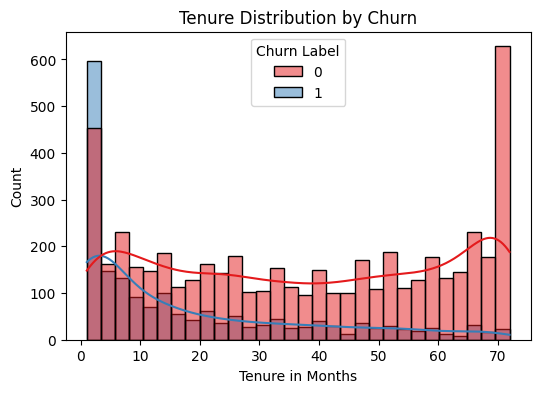

In [64]:
plt.figure(figsize=(6,4))
sns.histplot(
    data=df,
    x='Tenure in Months',
    hue='Churn Label',
    bins=30,
    kde=True,
    palette='Set1'
)
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure in Months")
plt.ylabel("Count")
plt.show()


### Tenure Distribution by Churn
This graph shows the relationship between customer tenure and churn.
Customers with low tenure have a higher chance of churn,
while customers with longer tenure usually stay with the company.


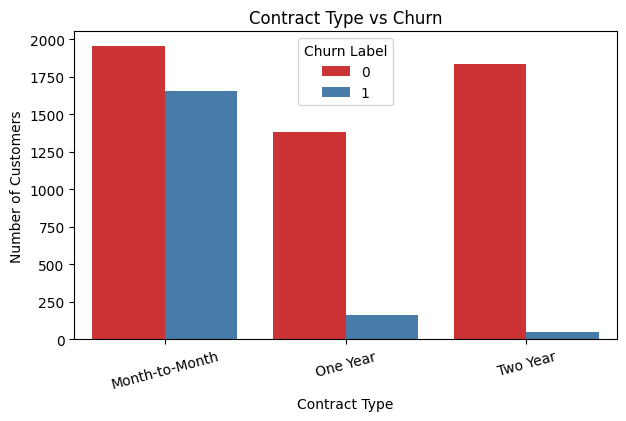

In [65]:
plt.figure(figsize=(7,4))
sns.countplot(
    x='Contract',
    hue='Churn Label',
    data=df,
    palette='Set1'
)

plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.show()


## 
This chart shows churn behavior across different contract types.
Customers with short-term contracts are more likely to churn.


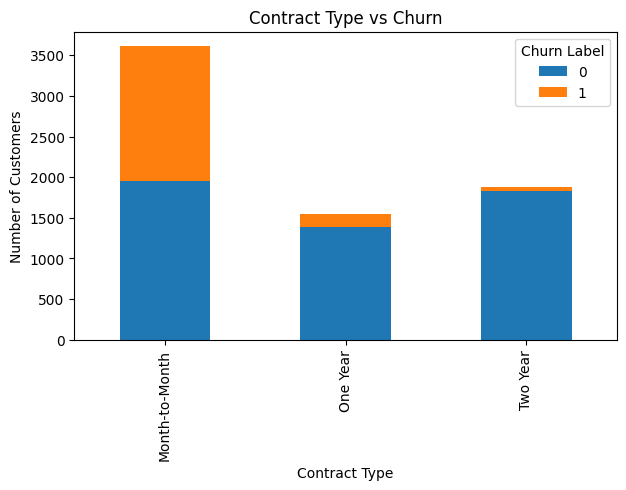

In [70]:
contract_churn = pd.crosstab(df['Contract'], df['Churn Label'])

contract_churn.plot(
    kind='bar',
    stacked=True,
    figsize=(7,4)
)

plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.show()


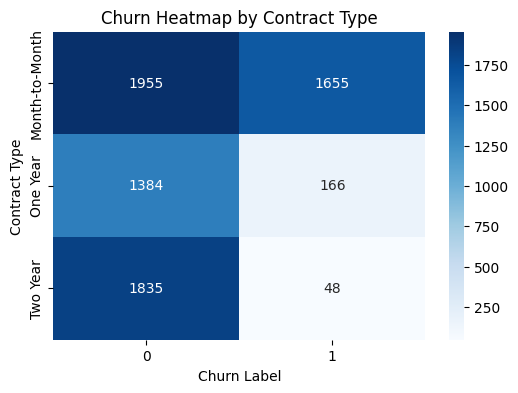

In [73]:
import seaborn as sns

churn_matrix = pd.crosstab(df['Contract'], df['Churn Label'])

plt.figure(figsize=(6,4))
sns.heatmap(
    churn_matrix,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.title("Churn Heatmap by Contract Type")
plt.xlabel("Churn Label")
plt.ylabel("Contract Type")
plt.show()

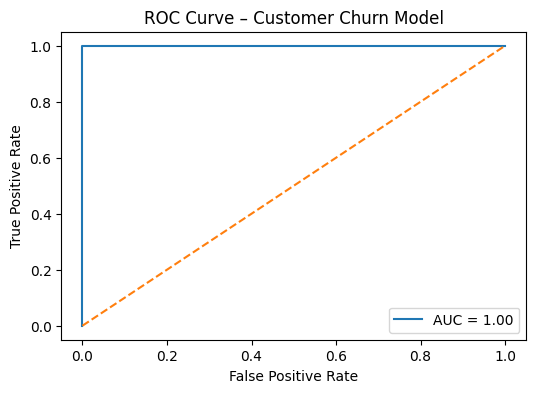

In [84]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Customer Churn Model")
plt.legend()
plt.show()


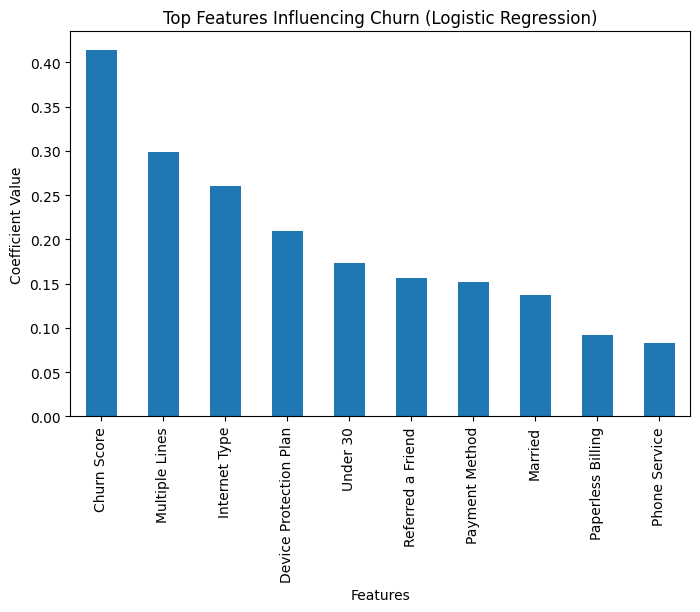

In [67]:
weights = pd.Series(
    lr.coef_[0],   # lr = LogisticRegression model
    index=X.columns
)

top_weights = weights.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_weights.plot(kind='bar')
plt.title("Top Features Influencing Churn (Logistic Regression)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()


## Logistic Regression Feature Importance
This chart shows the most important features influencing customer churn
based on Logistic Regression coefficients. Features with higher positive
values increase the likelihood of churn.


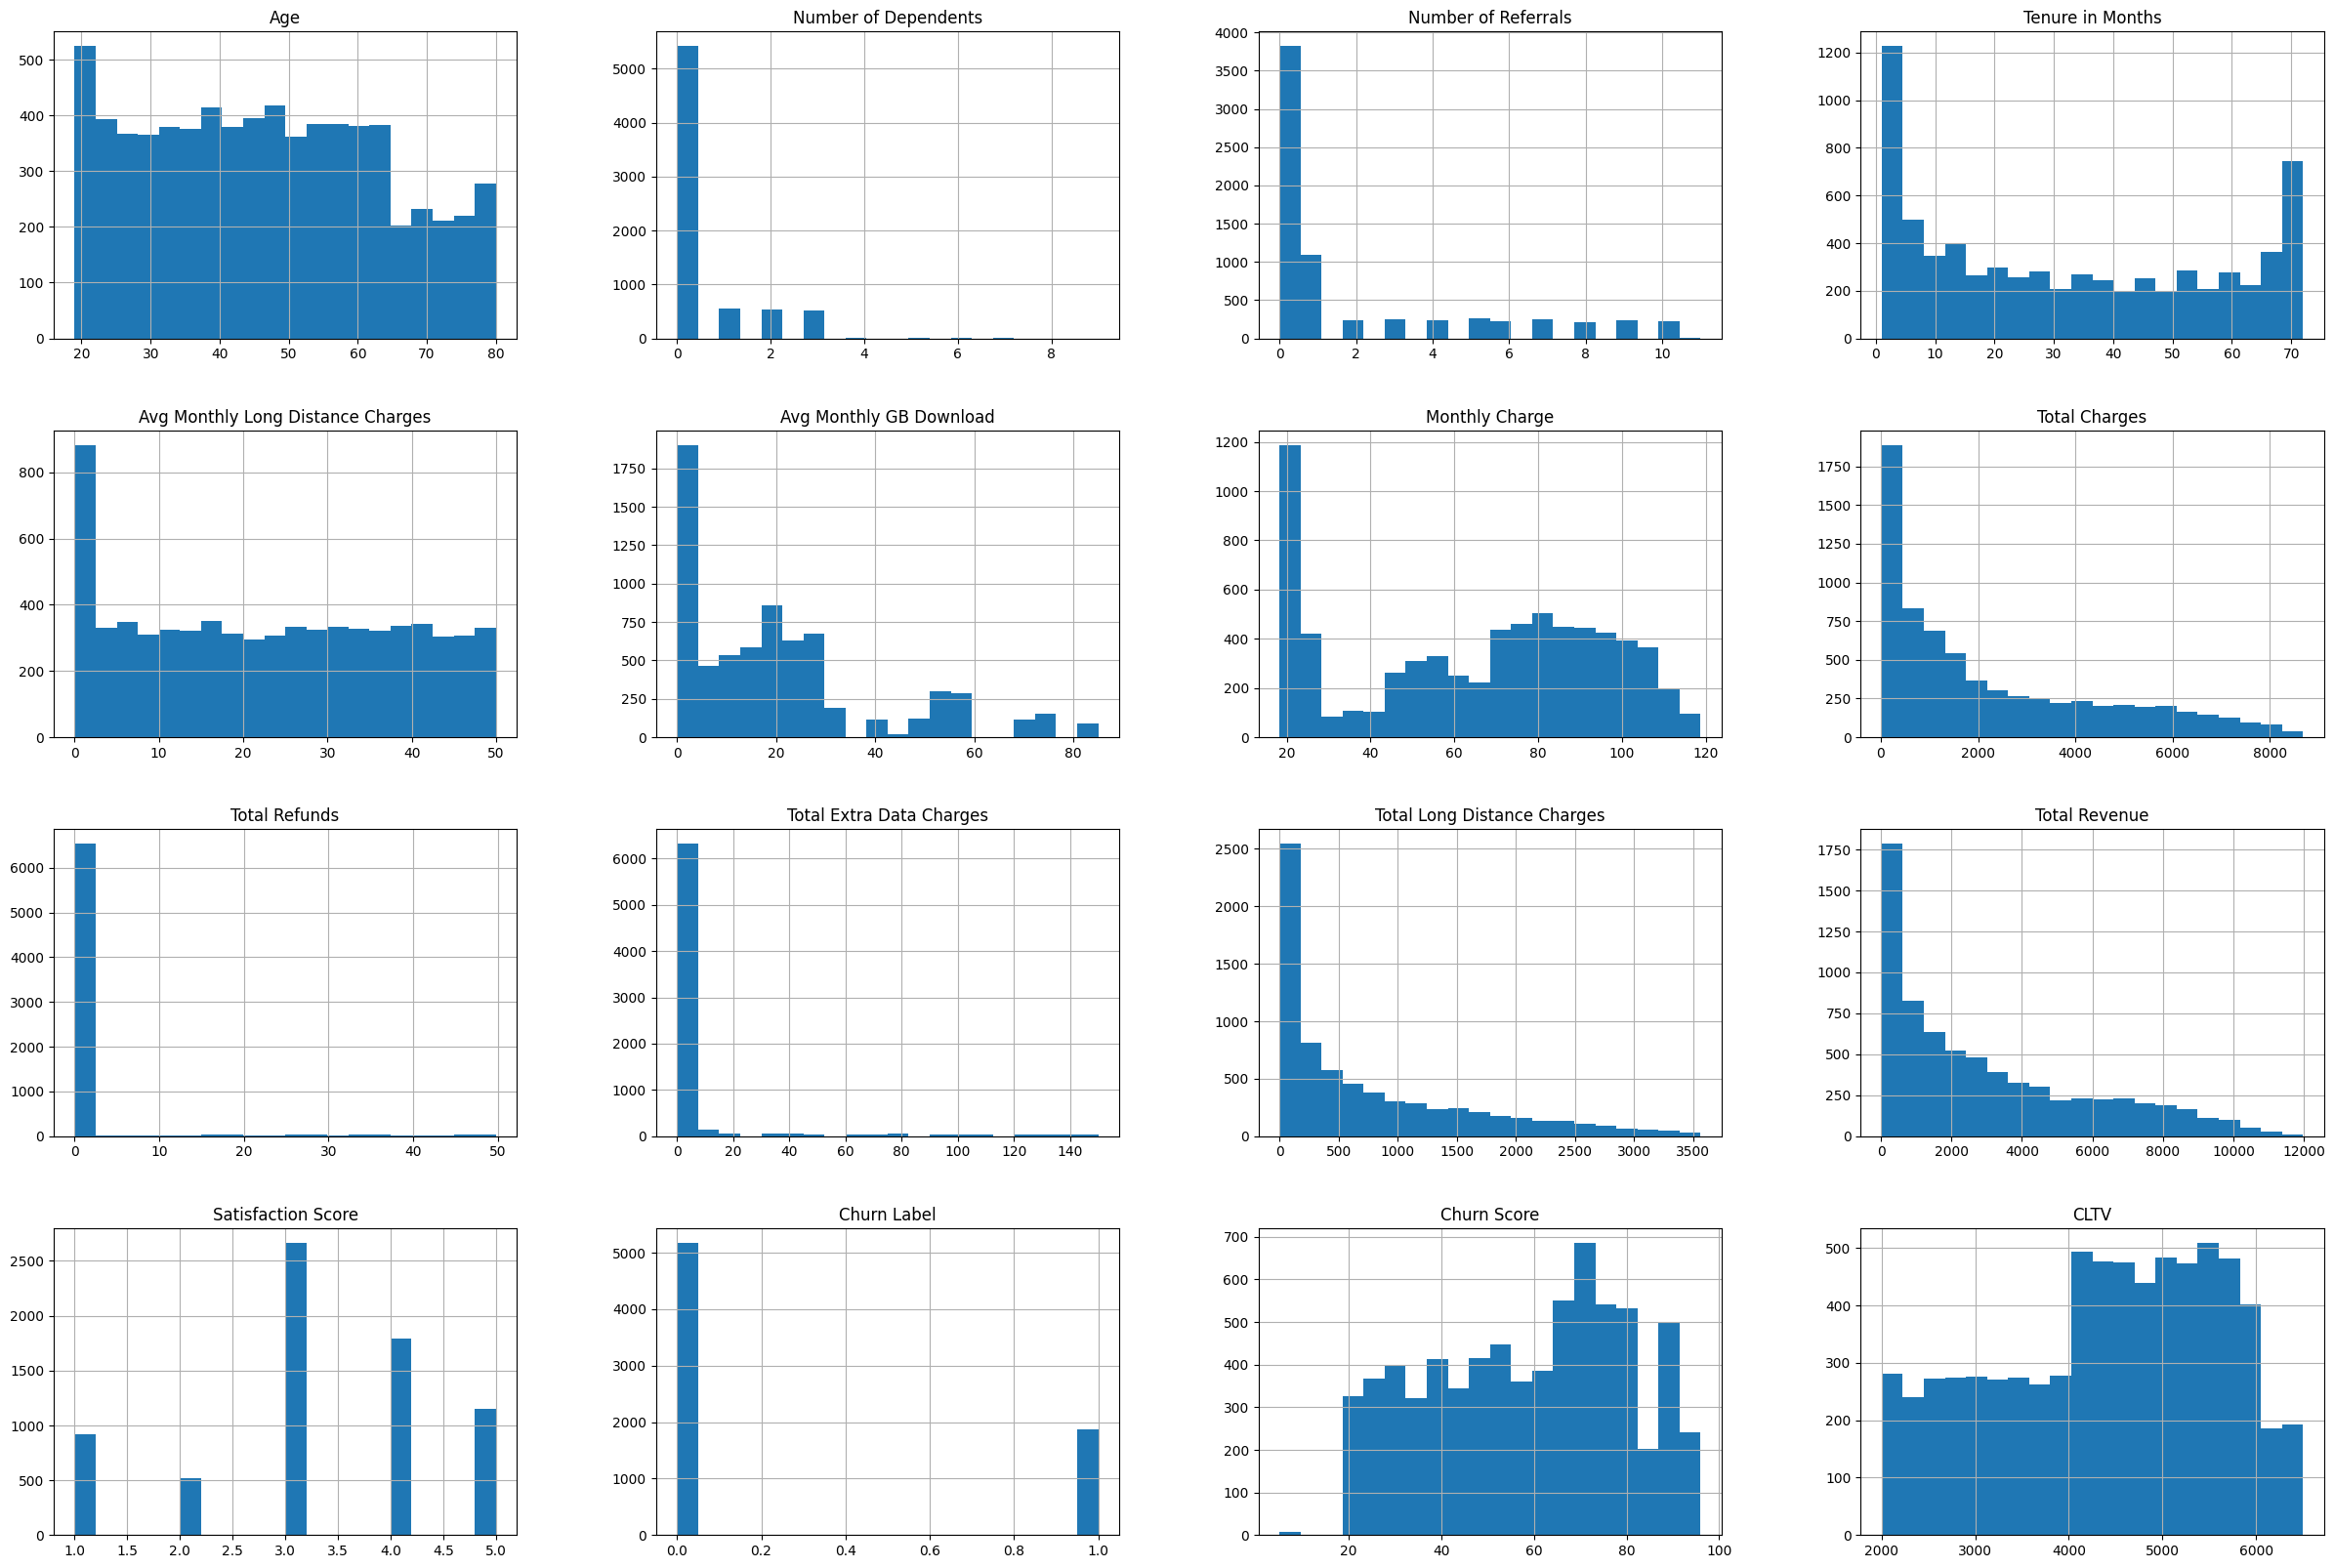

In [68]:
num_bins = 20
df.hist(bins=num_bins, figsize=(30,20))
plt.savefig("churn_histogram")
plt.show()

### Distribution of Numerical Features
This histogram shows the distribution of numerical features in the dataset.
It helps in understanding the data spread, skewness, and presence of outliers
before applying machine learning models.


## Conclusion

In this project, customer churn prediction was performed using machine learning
classification techniques. The dataset was analyzed, preprocessed, and used
to train models such as Logistic Regression and Decision Tree. Multiple evaluation
metrics were applied to measure model performance. The analysis helped identify
important factors influencing customer churn. Overall, the project demonstrates
how machine learning can support data-driven decision making for customer retention.


## Business Insights

The analysis shows that customers with lower tenure have a higher risk of churn.
Customers with low satisfaction scores are more likely to leave the company.
Features such as contract type and usage patterns also influence churn behavior.
Companies should focus on engaging new customers early and improving service quality.
Targeted retention strategies can be applied to high-risk customers identified by the model.


## Future Scope

• Advanced machine learning algorithms like Random Forest and XGBoost can be used to improve accuracy.  
• Real-time customer data can be integrated for continuous churn prediction.  
• The model can be deployed as a web application using Flask or Streamlit.  
• Additional customer behavior and usage data can enhance prediction performance.  
• Churn probability scores can be generated to support targeted retention strategies.
